Ejercicio 4 - Regresion Logística con Keras

En este ejercicio, tu objetivo será entrenar modelos de Regresión Lineal utilizando Keras (y Tensorflow como backend) para familiarizarte con la librería.



In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Entrena un modelo de Regresión Logística con Keras para el dataset de estudio 2D

El siguiente código carga un dataset de prueba con 2 dimensiones de entrada y una de salida.

Luego crea un modelo de regresión logística con Keras, y visualiza sus pesos iniciales. 

Es importante notar tres cosas:

1. La métrica utilizada es `'sparse_categorical_crossentropy'`, es decir la entropía cruzada. Esta es la misma métrica vista en la teoría de Regresión Logística Múltiple.
[cross entropy: sparse or not](https://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/)

If your targets are one-hot encoded, use categorical_crossentropy.
Examples of one-hot encodings:
[1,0,0]
[0,1,0]
[0,0,1]
But if your targets are integers, use sparse_categorical_crossentropy.
Examples of integer encodings (for the sake of completion):
1 
2 
3 

2. El optimizador es una clase que define el algoritmo para minimizar el error cuadrático. En general, son todas variantes de descenso de gradiente. En este caso, estamos utilizando descenso de gradiente estocástico (`keras.optimizers.SGD`), que es igual al descenso de gradiente pero realiza cada actualización de los parámetros con un subconjunto de los ejemplos del dataset. 

3. El método para entrenar el modelo es `fit`. En este caso, el parámetro `lr` lo recibe el optimizador, pero `fit` recibe la cantidad de iteraciones (`epochs`) y el tamaño del batch para el SGD (`batch_size`).


Al finalizar el entrenamiento, observá los valores del vector de pesos `w`. ¿A qué atributo o variable de entrada le da más importancia el modelo?

In [6]:
import tensorflow as tf
import keras
import numpy as np
import utils 

# Carga del dataset
import os
dataset_path=os.path.join("datasets_simples","study_logistic_2d.csv")


data=np.loadtxt(open(dataset_path, "rb"), delimiter=",", skiprows=1)
x,y=data[:,0:2],data[:,2]
# cantidad de ejemplos y dimension de entrada
n,d_in=x.shape
print(data, data.shape)

[[ 2.   4.   0. ]
 [ 5.   3.   0. ]
 [ 7.   4.   0. ]
 [ 9.   7.   0. ]
 [10.   4.   0. ]
 [11.   3.   0. ]
 [13.4  5.   0. ]
 [14.   3.   0. ]
 [15.   6.   1. ]
 [17.   4.   0. ]
 [19.   8.   1. ]
 [22.   8.   1. ]
 [25.   7.   1. ]
 [29.   9.   1. ]
 [31.   5.   0. ]
 [33.   6.   1. ]
 [35.   9.   1. ]
 [40.   8.   1. ]
 [42.   7.   1. ]] (19, 3)


In [7]:
# calcula la cantidad de clases
classes=int(y.max()+1)

In [8]:
print("Información del conjunto de datos:")
print(f"Ejemplos: {n}")
print(f"Variables de entrada: {d_in}")
print(f"Cantidad de clases: {classes}")

Información del conjunto de datos:
Ejemplos: 19
Variables de entrada: 2
Cantidad de clases: 2


Inicialización aleatoria del modelo (podes volver a correr esta celda para obtener otros resultados)



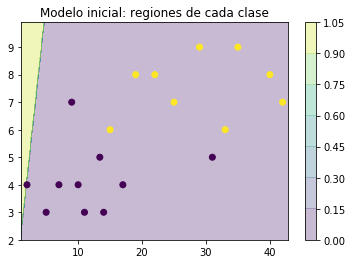

In [9]:
# Creación del modelo logítico
print("Inicialización aleatoria del modelo (podes volver a correr esta celda para obtener otros resultados)")

# la activación softmax hace que la salida sean probabilidades
layer = keras.layers.Dense(classes, input_shape=(d_in,), activation='softmax')
    # Creo un modelo lineal
modelo = keras.Sequential([layer])

# visualización del modelo inicial
utils.plot_regresion_logistica2D(modelo, x, y,title="Modelo inicial")

In [10]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [26]:
modelo.compile(
  optimizer=keras.optimizers.SGD(lr=0.001), 
  loss='sparse_categorical_crossentropy', 
  # metricas para ir calculando en cada iteracion 
  # Agregamos el accuracy del modelo (porque es una clasificación)
  metrics=['accuracy'], 
)

In [27]:
# Entrenamiento del modelo
history = modelo.fit(x, y, epochs=1000, batch_size=16, verbose=0)

In [28]:
# visualiza el modelo y los datos
w,b=modelo.get_weights()
print(f"w: {w}, b: {b}")

w: [[ 0.17712536 -1.064512  ]
 [ 0.09393934 -0.5316238 ]], b: [ 0.00078448 -0.00078448]


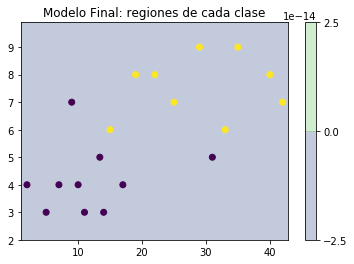

In [29]:
utils.plot_regresion_logistica2D(modelo, x, y,title="Modelo Final")

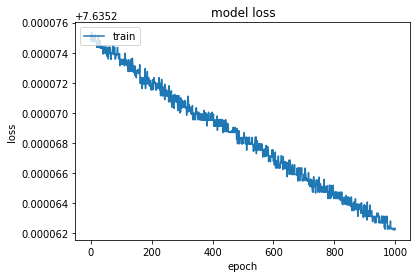

In [30]:
def plot_curve(history, ind):
# summarize history for loss
    plt.plot(history.history[ind])
    # plt.plot(history.history['val_loss'])
    plt.title(f'model {ind}')
    plt.ylabel(ind)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
plot_curve(history, "loss")

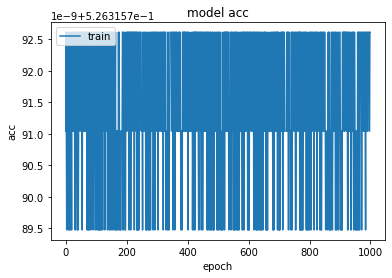

In [31]:
plot_curve(history, 'acc')

# Reentrenamiento con otro optimizador

En la mayoría de los casos, el modelo no converge adecuadamente, aún cambiando la tasa de aprendizaje. Podemos utilizar el optimizador [Adam](https://arxiv.org/abs/1412.6980) que logra que el modelo converja aún cuando `SGD` no puede.






In [32]:
# la activación softmax hace que la salida sean probabilidades
layer = keras.layers.Dense(classes,input_shape=(d_in,), activation='softmax')
modelo = keras.Sequential([layer])

In [33]:
modelo.compile(
  optimizer='adam', # Cambiamos el optimizador a ADAM
  loss='sparse_categorical_crossentropy', 
  metrics=['accuracy'], 
# A metric function is similar to a loss function, 
# except that the results from evaluating a metric are not used when training the model.
)

In [34]:
# Entrenamiento del modelo
history = modelo.fit(x,y,epochs=1000,batch_size=16, verbose=0)

In [35]:
w,b=modelo.get_weights()
print(f"w: {w}, b: {b}")

w: [[ 0.22740738  0.13163471]
 [-0.44527492  0.42064598]], b: [ 1.0631347 -1.0631346]


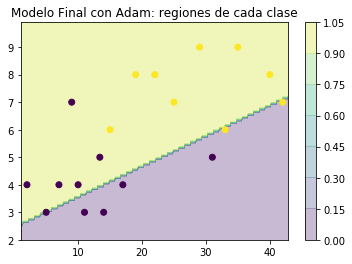

In [36]:
utils.plot_regresion_logistica2D(modelo,x,y,title="Modelo Final con Adam")

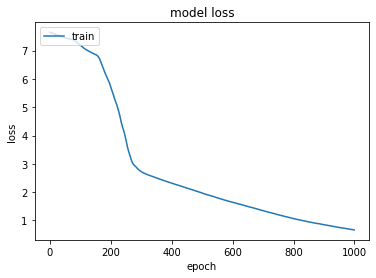

In [37]:
plot_curve(history, 'loss')

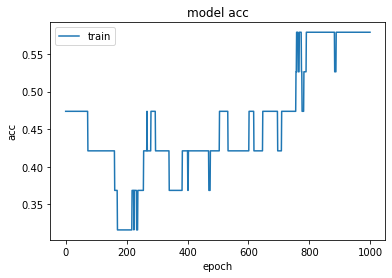

In [38]:
plot_curve(history, 'acc')

# Entrenamiento con normalización de los datos

Una mejor opción para lograr que el modelo converja es normalizar los datos de entrada. En este caso vemos como dicha normalización permite que el modelo siempre converja. 


Implementa la normalización media/desviación estándar de los datos de la variable x_norm, que es una copia de x.


Al finalizar el entrenamiento, observá los valores del vector de pesos `w`. ¿A qué atributo o variable de entrada le da más importancia el modelo? ¿Cambió con la normalización?

In [20]:
from sklearn.preprocessing import StandardScaler
x_norm=x.copy()
# Normalizacion mu/std de los datos de entrada

# TODO
for i in range(d_in):
    # normalizo la columna i restando su media y dividiendo por su desv. est.
    x_norm[:,i] = (x_norm[:,i] - x_norm[:,i].mean()) / x_norm[:,i].std()

print((x_norm == StandardScaler().fit_transform(x)).all()) # (me da el mismo resultado:)

True


In [39]:
from sklearn.preprocessing import StandardScaler
x_norm = StandardScaler().fit_transform(x)

In [54]:
# la activación softmax hace que la salida sean probabilidades
layer = keras.layers.Dense(classes,input_shape=(d_in,), activation='softmax') 
modelo = keras.Sequential([layer])

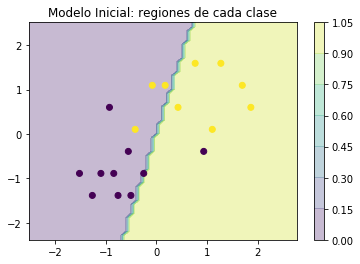

In [55]:
utils.plot_regresion_logistica2D(modelo,x_norm,y,title="Modelo Inicial")

In [57]:
modelo.compile(
  optimizer='adam',#keras.optimizers.SGD(lr=0.001), 
  loss='sparse_categorical_crossentropy', 
  metrics=['accuracy'], 
)

In [58]:
# Entrenamiento del modelo
history = modelo.fit(x_norm,y,epochs=1000,batch_size=16, verbose=0)

In [59]:
# visualiza el modelo y los datos
w,b=modelo.get_weights()
print(f"w: {w}, b: {b}")

w: [[-1.1546857   0.26782167]
 [-1.1872362   0.85212964]], b: [ 0.11532235 -0.11532235]


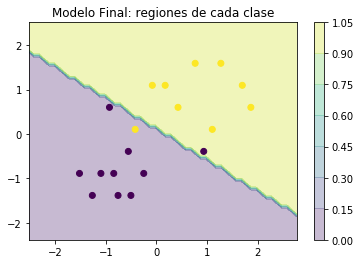

In [60]:
utils.plot_regresion_logistica2D(modelo,x_norm,y,title="Modelo Final")

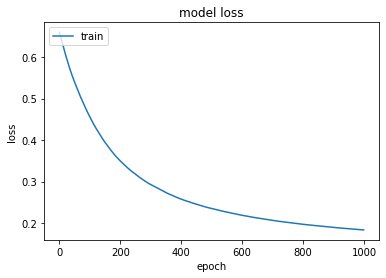

In [61]:
plot_curve(history, 'loss')

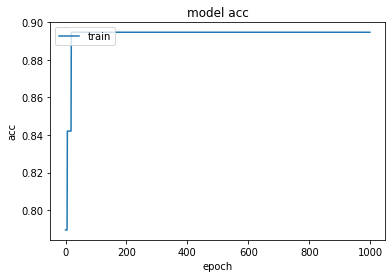

In [62]:
plot_curve(history, 'acc')

In [76]:
(modelo.predict_classes(x_norm) == y).sum() / 19

0.8947368421052632